# Задача 2: аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)


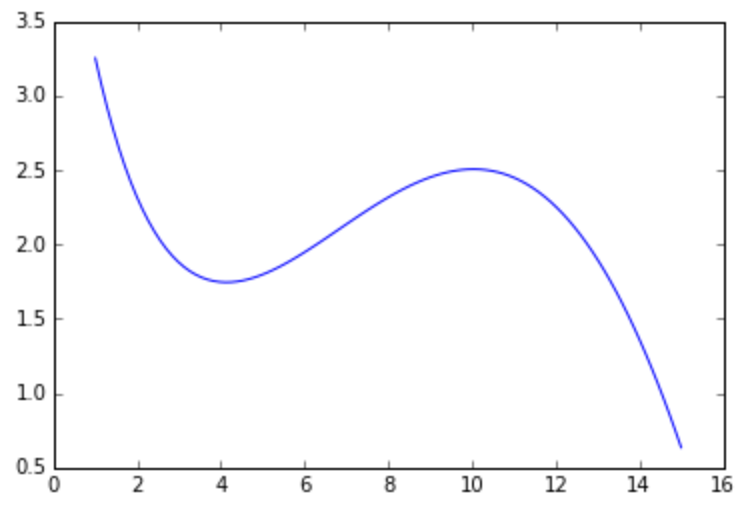

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

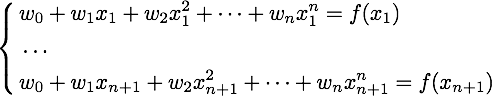

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.


In [27]:
from scipy import linalg
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import interpolate

## шаг 1
Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [28]:
def f(x):
    return np.sin(x/ 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

print(f(1), f(15))

3.252216865271419 0.6352214195786656


Линейное уравнение  $k*x + b = y$. Нам известны $x$ и $y$, нужно найти $k$ и $b$  
система:  
$k*1 + b = f(1)$  
$k*15 + b = f(15)$  


In [29]:
A = np.array([[1,1], [15,1]])

y = np.array([f(1), f(15)])
print(A, y)

[[ 1  1]
 [15  1]] [3.25221687 0.63522142]


In [30]:
[k1,b1] = linalg.solve(A,y)
print(b1)

def f0(x):
    return k1*x+b1;

print(f0(3))

3.43914511139233
2.8783603730295972


In [31]:
x = np.arange(1, 15, 0.1)
y = f(x)
y0 = f0(x)

print(x[:5])
print(y[:5])
print(y0[:5])

[1.  1.1 1.2 1.3 1.4]
[3.25221687 3.12835399 3.01206714 2.90299951 2.80081118]
[3.25221687 3.23352404 3.21483122 3.19613839 3.17744557]


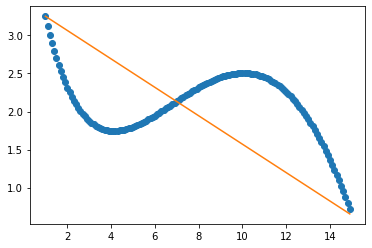

In [32]:
plt.plot(x, y, 'o', x, y0, '-')
plt.show()

## Шаг 2
Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

Линейное уравнение  $a*x^2 + b*x + c*x = y$. Нам известны $x$ и $y$, нужно найти $a$, $b$, $c$  
система:  
$a*x^2 + b*x + c*x = f(1)$   
$a*x^2 + b*x + c*x = f(8)$  
$a*x^2 + b*x + c*x = f(15)$  

In [33]:
xi = [1,8,15]

A1 = np.array([
    [xi[0]**2, xi[0], 1], 
    [xi[1]**2, xi[1], 1], 
    [xi[2]**2, xi[2], 1]
])
print(A1)
y1 = np.array([f(1), f(8), f(15)])
print(y1)

[a1,b1,c1] = linalg.solve(A1,y1)

def f1(x):
    return a1*(x**2)+b1*x+c1;


[[  1   1   1]
 [ 64   8   1]
 [225  15   1]]
[3.25221687 2.31617016 0.63522142]


[1.  1.1 1.2 1.3 1.4]
[3.25221687 3.12835399 3.01206714 2.90299951 2.80081118]
[3.25221687 3.24408949 3.23581009 3.22737867 3.21879523]


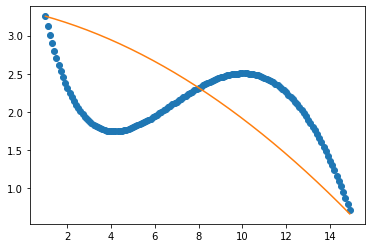

In [34]:
x = np.arange(1, 15, 0.1)
y = f(x)
y0 = f1(x)

print(x[:5])
print(y[:5])
print(y0[:5])

plt.plot(x, y, 'o', x, y0, '-')
plt.show()

## Шаг 3
Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)

In [36]:
xi = [1,4,10,15]

A2 = np.array([
    [xi[0]**3, xi[0]**2, xi[0], 1], 
    [xi[1]**3, xi[1]**2, xi[1], 1], 
    [xi[2]**3, xi[2]**2, xi[2], 1], 
    [xi[3]**3, xi[3]**2, xi[3], 1], 
])
print(A2)
y2= np.array([f(1), f(4), f(1), f(15)])
print(y2)

[a2,b2,c2,d2] = linalg.solve(A2,y2)

def f2(x):
    return a2*(x**3)+ b2*(x**2)+c2*x+d2;


[[   1    1    1    1]
 [  64   16    4    1]
 [1000  100   10    1]
 [3375  225   15    1]]
[3.25221687 1.74684595 3.25221687 0.63522142]


[1.  1.1 1.2 1.3 1.4]
[3.25221687 3.12835399 3.01206714 2.90299951 2.80081118]
[3.25221687 3.14938956 3.05080926 2.95640996 2.86612564]


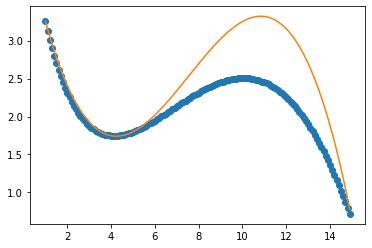

In [37]:
x = np.arange(1, 15, 0.1)
y = f(x)
y0 = f2(x)

print(x[:5])
print(y[:5])
print(y0[:5])

plt.plot(x, y, 'o', x, y0, '-')
plt.show()